In [1]:
from sequenzo import *
import pandas as pd
import numpy as np
import hdbscan

family_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/family_15_35.csv')
happiness_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/happiness_15_35.csv')

family_mapping = {
    1: "Single",
    2: "Romantic Partner",
    3: "Married"
}

# 替换 time columns（15~35）为 label
time_cols = [str(i) for i in range(15, 36)]
family_df[time_cols] = family_df[time_cols].replace(family_mapping)

happiness_mapping = {
    1: "Unhappy",
    2: "Somewhat unhappy",
    3: "Neutral",
    4: "Somewhat happy",
    5: "Happy"
}

happiness_df[time_cols] = happiness_df[time_cols].replace(happiness_mapping)

# --------------

time_cols = []

for i in list(range(15, 36)):
    time_cols.append(str(i))
    
family_colors = ["#D1C2D3", "#C4473D", "#574266"]
    
family_sequence = SequenceData(data=family_df,
                               time_type='age',
                               time=time_cols,
                               states=["Single", "Romantic Partner", "Married"],
                               custom_colors=family_colors)

happiness_colors = ["#4263A3", "#8AB7C5", "#D6DEE9", "#E0BA19", "#C69519"]

happiness_sequence = SequenceData(data=happiness_df,
                                  time_type='age',
                                  time=time_cols,
                                  states=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"],
                                  custom_colors=happiness_colors)

# family_sequence = SequenceData(data=family_df,
#                                time_type='age',
#                                time=time_cols,
#                                states=[1, 2, 3],
#                                labels=["Single", "Romantic Partner", "Married"])
# 
# happiness_sequence = SequenceData(data=happiness_df,
#                                   time_type='age',
#                                   time=time_cols,
#                                   states=[1, 2, 3, 4, 5],
#                                   labels=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"])

distance_matrix_family = get_distance_matrix(seqdata=family_sequence,
                                             method='OM',
                                             norm='auto',
                                             sm="CONSTANT",
                                             indel=1)

distance_matrix_happiness = get_distance_matrix(seqdata=happiness_sequence,
                                                method='OM',
                                                norm='auto',
                                                sm="CONSTANT",
                                                indel=1)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: ['Single', 'Romantic Partner', 'Married']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: ['Unhappy', 'Somewhat unhappy', 'Neutral', 'Somewhat happy', 'Happy']
[>] Processing 1538 sequences with 3 unique states.
  - Creating 4x4 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 859 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.
[>] Processing 1538 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 895 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computi

In [2]:
happiness_df

,ID,15,16,17,18,19,20,21,22,23,...,26,27,28,29,30,31,32,33,34,35
0,1,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Happy,Happy,Happy,Happy,...,Happy,Happy,Happy,Happy,Happy,Happy,Happy,Happy,Happy,Happy
1,2,Neutral,Neutral,Neutral,Happy,Neutral,Happy,Neutral,Neutral,Neutral,...,Somewhat happy,Neutral,Neutral,Neutral,Neutral,Neutral,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy
2,5,Happy,Happy,Happy,Happy,Happy,Happy,Happy,Happy,Happy,...,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Neutral,Somewhat happy,Happy,Happy,Happy
3,6,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Somewhat unhappy,Somewhat unhappy,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Somewhat unhappy,Somewhat unhappy,Neutral,Neutral
4,7,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1992,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1534,1995,Happy,Happy,Happy,Happy,Happy,Happy,Happy,Somewhat happy,Neutral,...,Unhappy,Unhappy,Unhappy,Happy,Happy,Happy,Somewhat happy,Somewhat happy,Somewhat happy,Neutral
1535,1996,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Happy,Happy,Happy,...,Happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy
1536,1997,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Happy,...,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Somewhat happy,Neutral,Neutral,Neutral


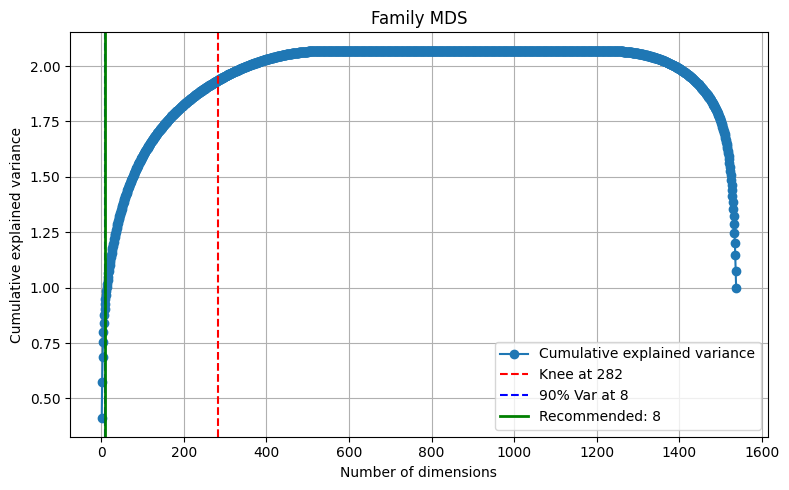

最终推荐维度（Family）： 154


In [3]:
# MDS 处理
X_family, eigvals_family = cmdscale(distance_matrix_family)

# 计算解释方差
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# 自动选择维度
result_family = find_optimal_mds_dimension(
    cum_explained,
    title='Family MDS',
    var_threshold=0.90,
    max_dim=200
)

optimal_dim_family = result_family['recommended']
print("最终推荐维度（Family）：", 154)

# 获取最终嵌入矩阵
# X_family_optimal = X_family[:, :optimal_dim_family]
X_family_optimal = X_family[:, :282]

# TODO：选择一百多的维度再试试看！！！！

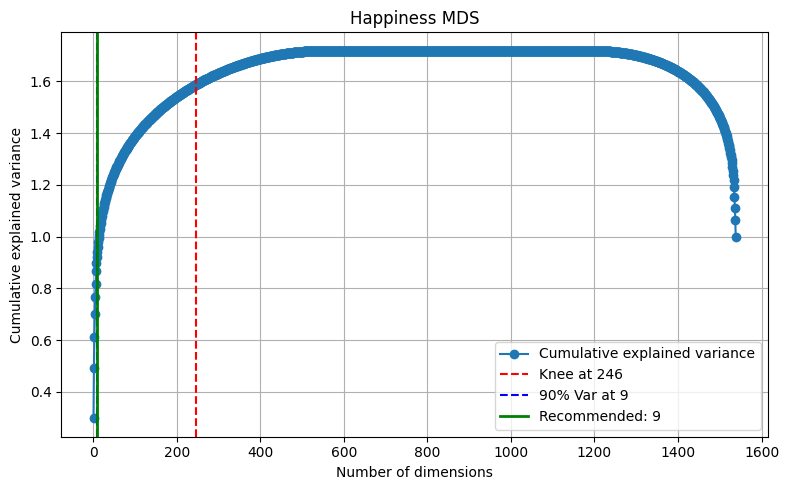

最终推荐维度（Happiness）： 9


In [4]:
# MDS 处理
X_happiness, eigvals_family = cmdscale(distance_matrix_happiness)

# 计算解释方差
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# 自动选择维度
result_happiness = find_optimal_mds_dimension(
    cum_explained,
    title='Happiness MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_happiness = result_happiness['recommended']
print("最终推荐维度（Happiness）：", optimal_dim_happiness)

# 获取最终嵌入矩阵
# X_happiness_optimal = X_happiness[:, :optimal_dim_happiness]
X_happiness_optimal = X_happiness[:, :246]

In [5]:
# 获取最终嵌入矩阵
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])

X_concat

array([[ 0.43517119,  0.4848114 , -0.1081768 , ..., -0.01426059,
        -0.01654761, -0.00795521],
       [-0.00801619, -0.38782514,  0.15337688, ...,  0.02256234,
        -0.00622661,  0.05663371],
       [ 0.40564192, -0.62276974,  0.03838032, ..., -0.00837668,
        -0.01770728,  0.00541184],
       ...,
       [ 0.36733092,  0.42318198, -0.36475079, ..., -0.04626579,
         0.03179986, -0.01224732],
       [ 0.13966591,  0.74834773, -0.12558048, ...,  0.03532763,
        -0.00761127,  0.05058099],
       [ 0.16052912,  0.68043827, -0.17386576, ...,  0.02605313,
         0.00556627, -0.02320529]])

## Cluster analysis

In [6]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
cluster_labels = clusterer.fit_predict(X_concat)

# 看一下聚了几个 cluster
print(np.unique(cluster_labels, return_counts=True))

/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(array([-1,  0,  1]), array([1270,   40,  228]))


In [7]:
# 构建 DataFrame 用于 plot
hdbscan_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": cluster_labels
})

hdbscan_df

,ID,Cluster ID
0,1,-1
1,2,-1
2,5,-1
3,6,-1
4,7,-1
...,...,...
1533,1992,1
1534,1995,-1
1535,1996,-1
1536,1997,-1


In [8]:
hdbscan_df.to_csv('hdbscan_df.csv')

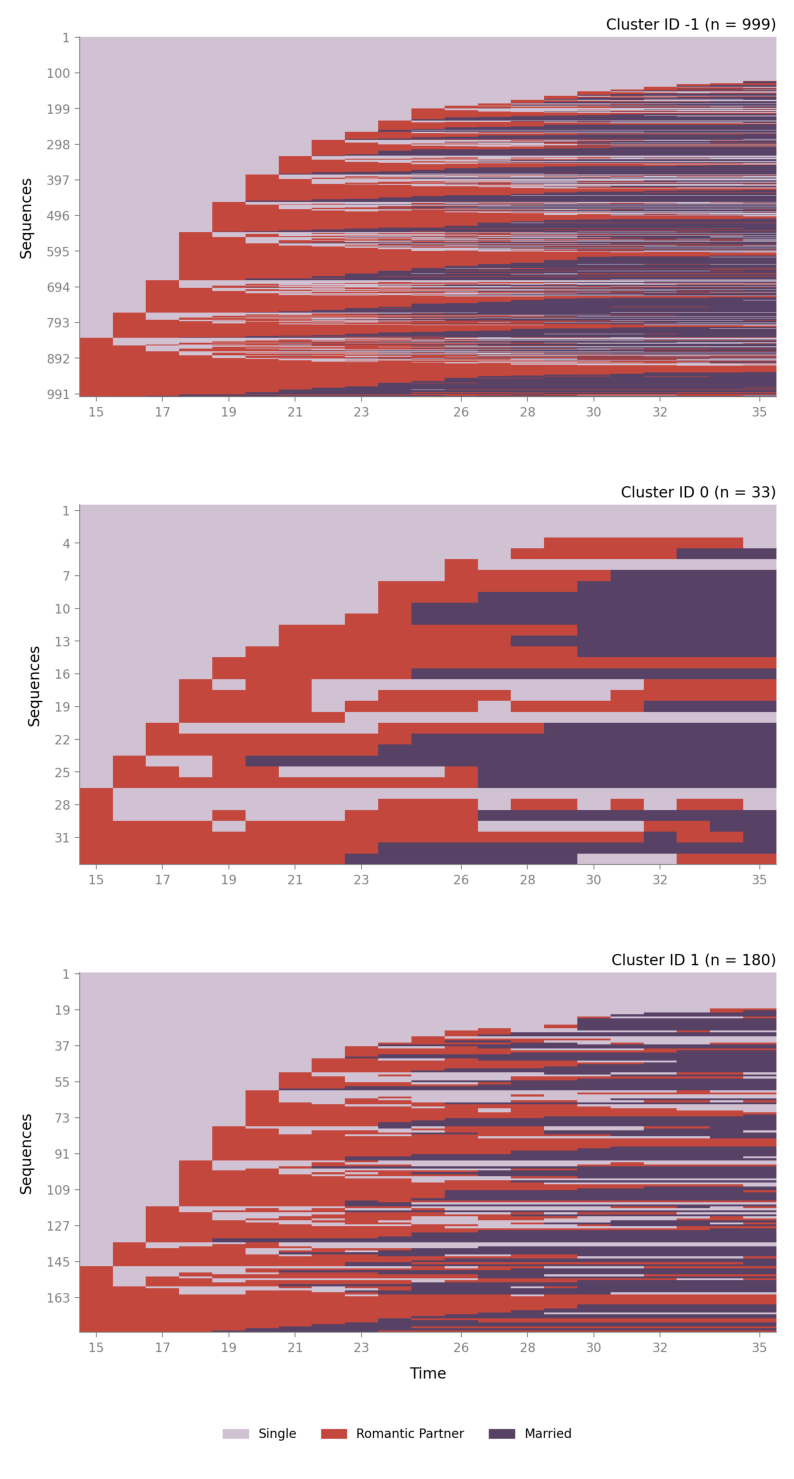

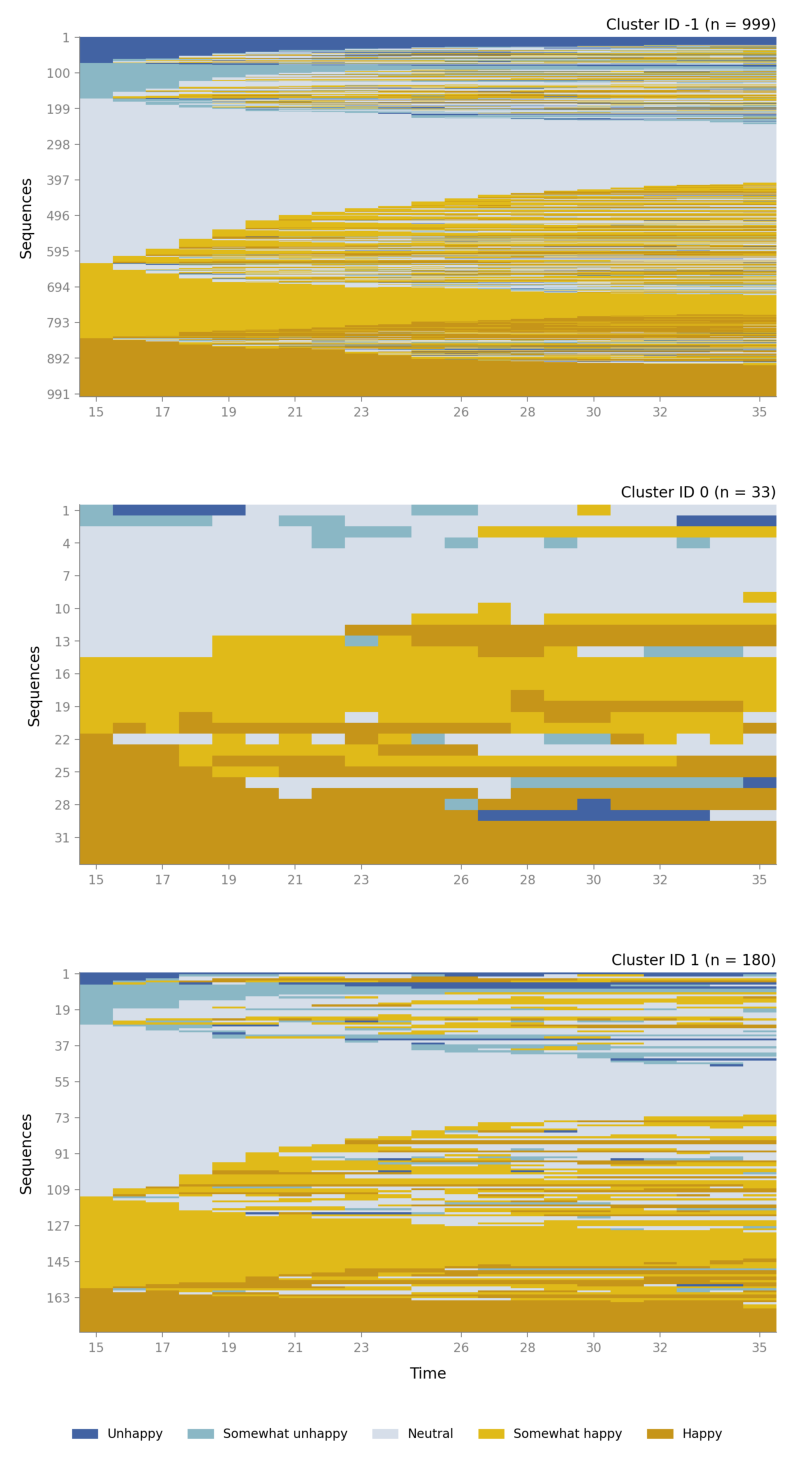

In [10]:
from sequenzo.visualization.plot_sequence_index import plot_sequence_index

# 画出家庭轨迹，按首次结婚时间排序
plot_sequence_index(
    seqdata=family_sequence,
    id_group_df=hdbscan_df,
    categories="Cluster ID",
    # sort_by="final_state",
    # sort_by="first_marriage",  # 可以换成 "transition_count", "final_state"
    # title="Family Trajectories Sorted by First Marriage",
    ncols=1,
    nrows=3,
    save_as="family_normalized"
)

# 画出幸福轨迹，按幸福增长速度排序
plot_sequence_index(
    seqdata=happiness_sequence,
    id_group_df=hdbscan_df,
    categories="Cluster ID",
    # sort_by="final_state",
    # sort_by="happiness_slope",
    # title="Happiness Trajectories Sorted by Growth Slope",
    ncols=1,
    nrows=3,
    save_as="happiness_normalized"
)


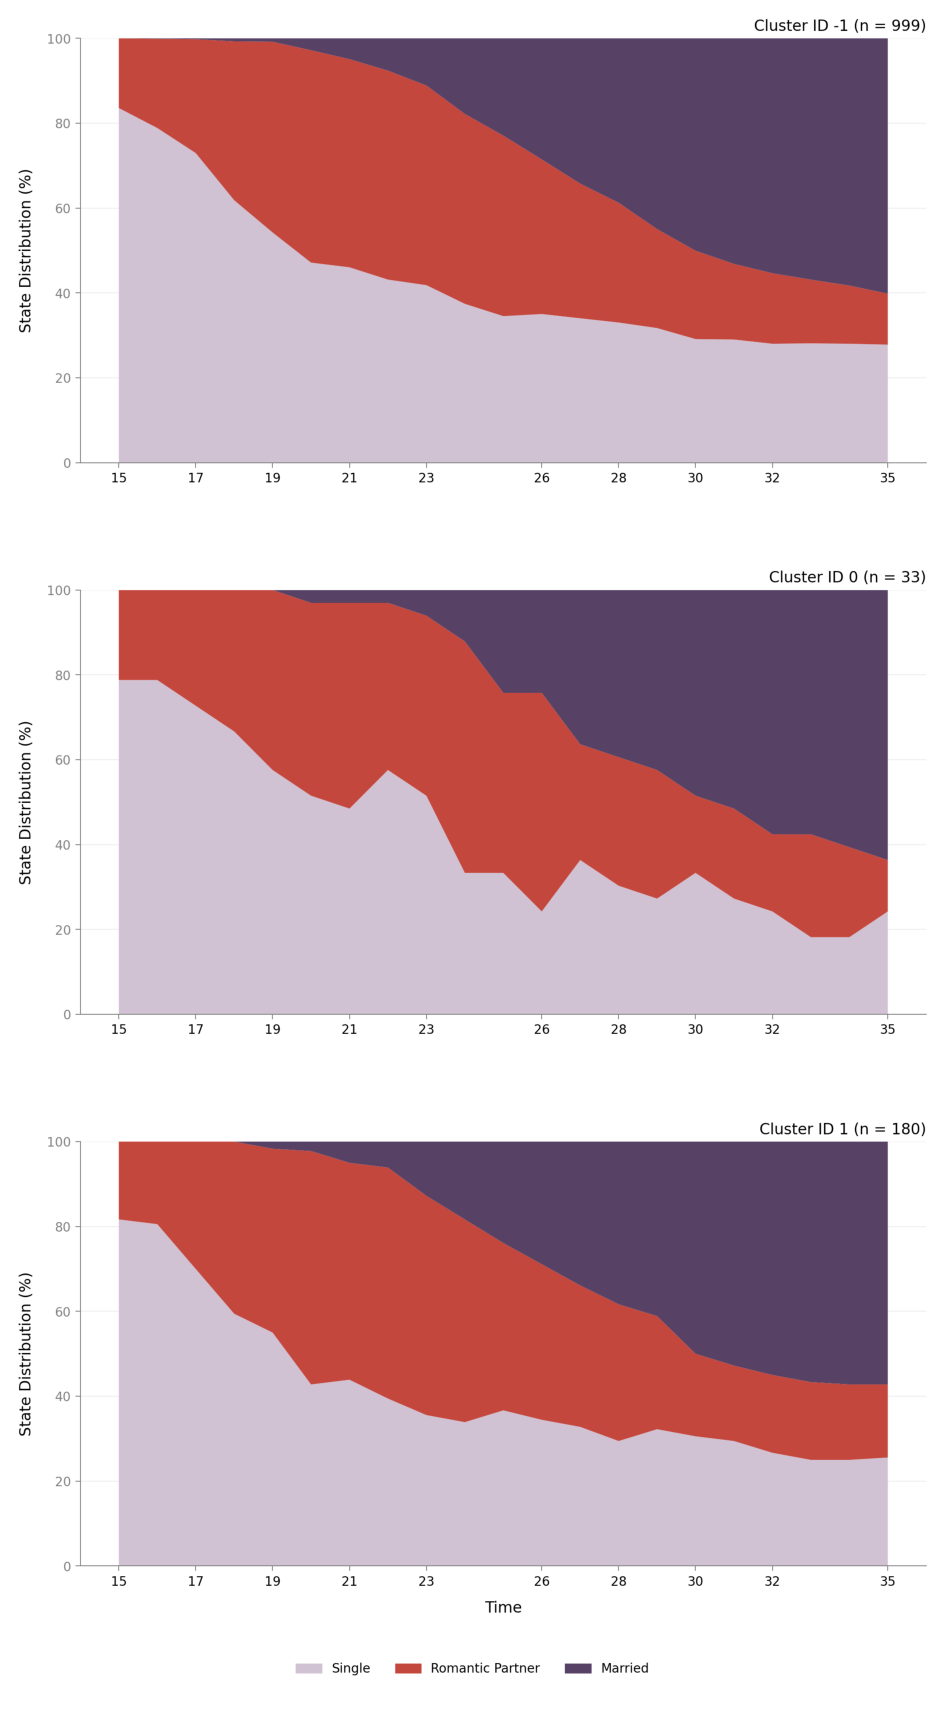

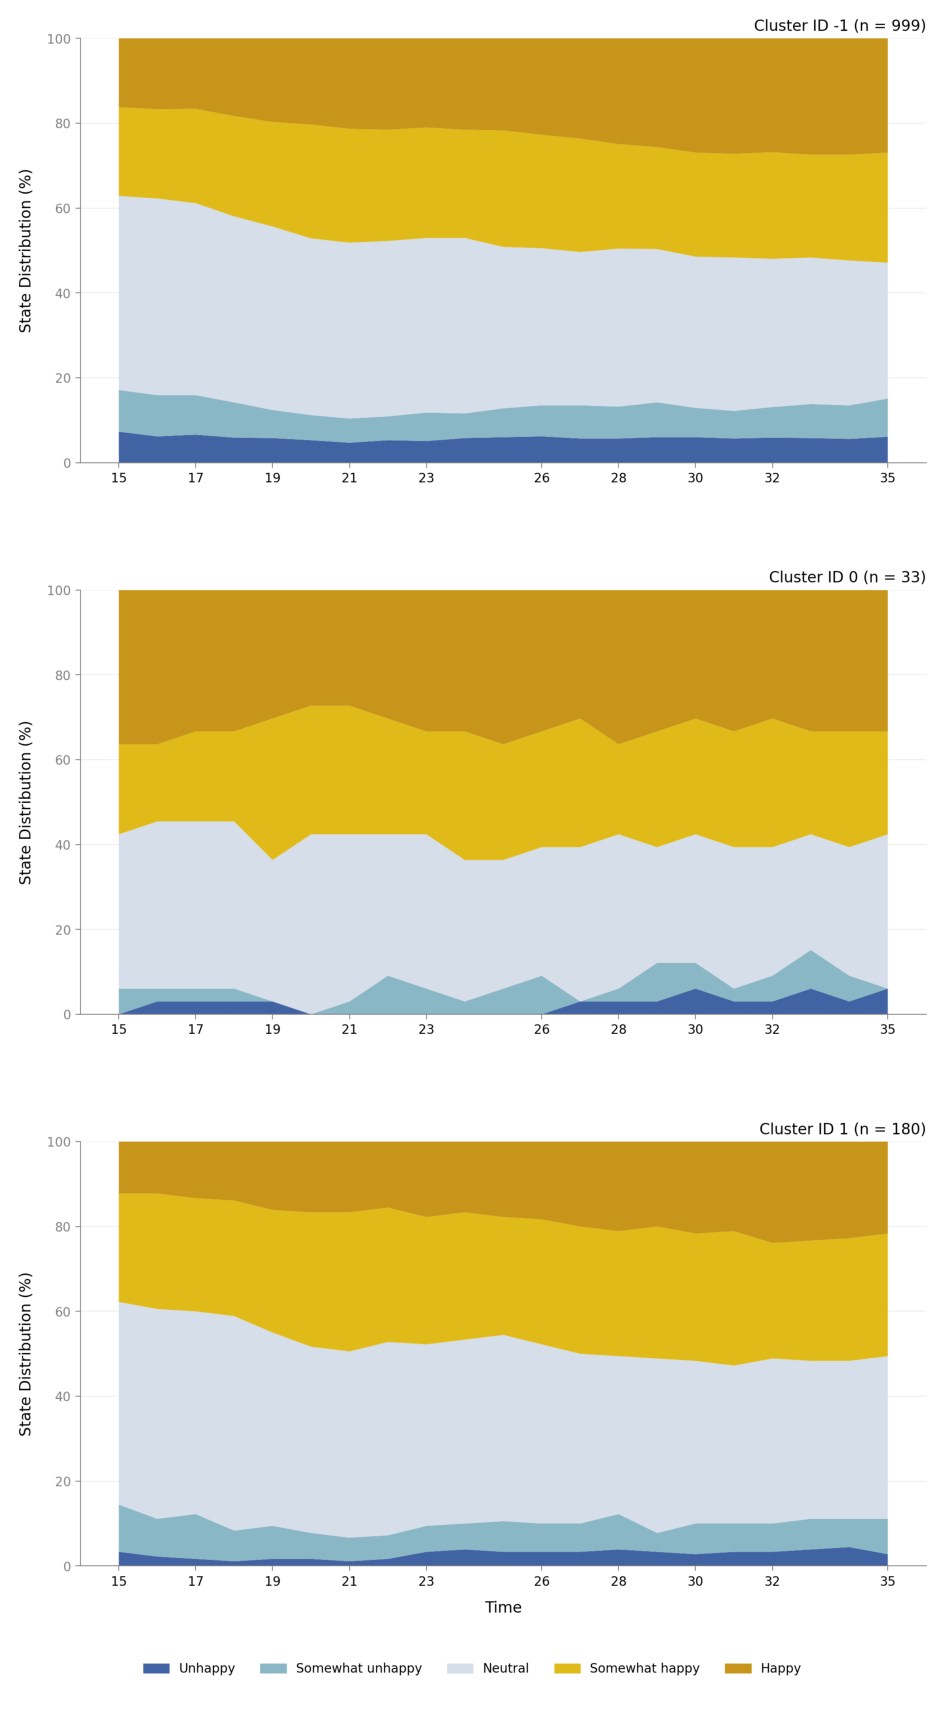

In [11]:
# 可视化 family sequence 按 cluster
plot_state_distribution(seqdata=family_sequence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    ncols=1,
                    nrows=3,
                    save_as='hdbscan_family_plot_distribution')

# 可视化 happiness sequence 按 cluster
plot_state_distribution(seqdata=happiness_sequence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    ncols=1,
                    nrows=3,
                    save_as='hdbscan_happiness_plot_distribution')

剔除noise再观察

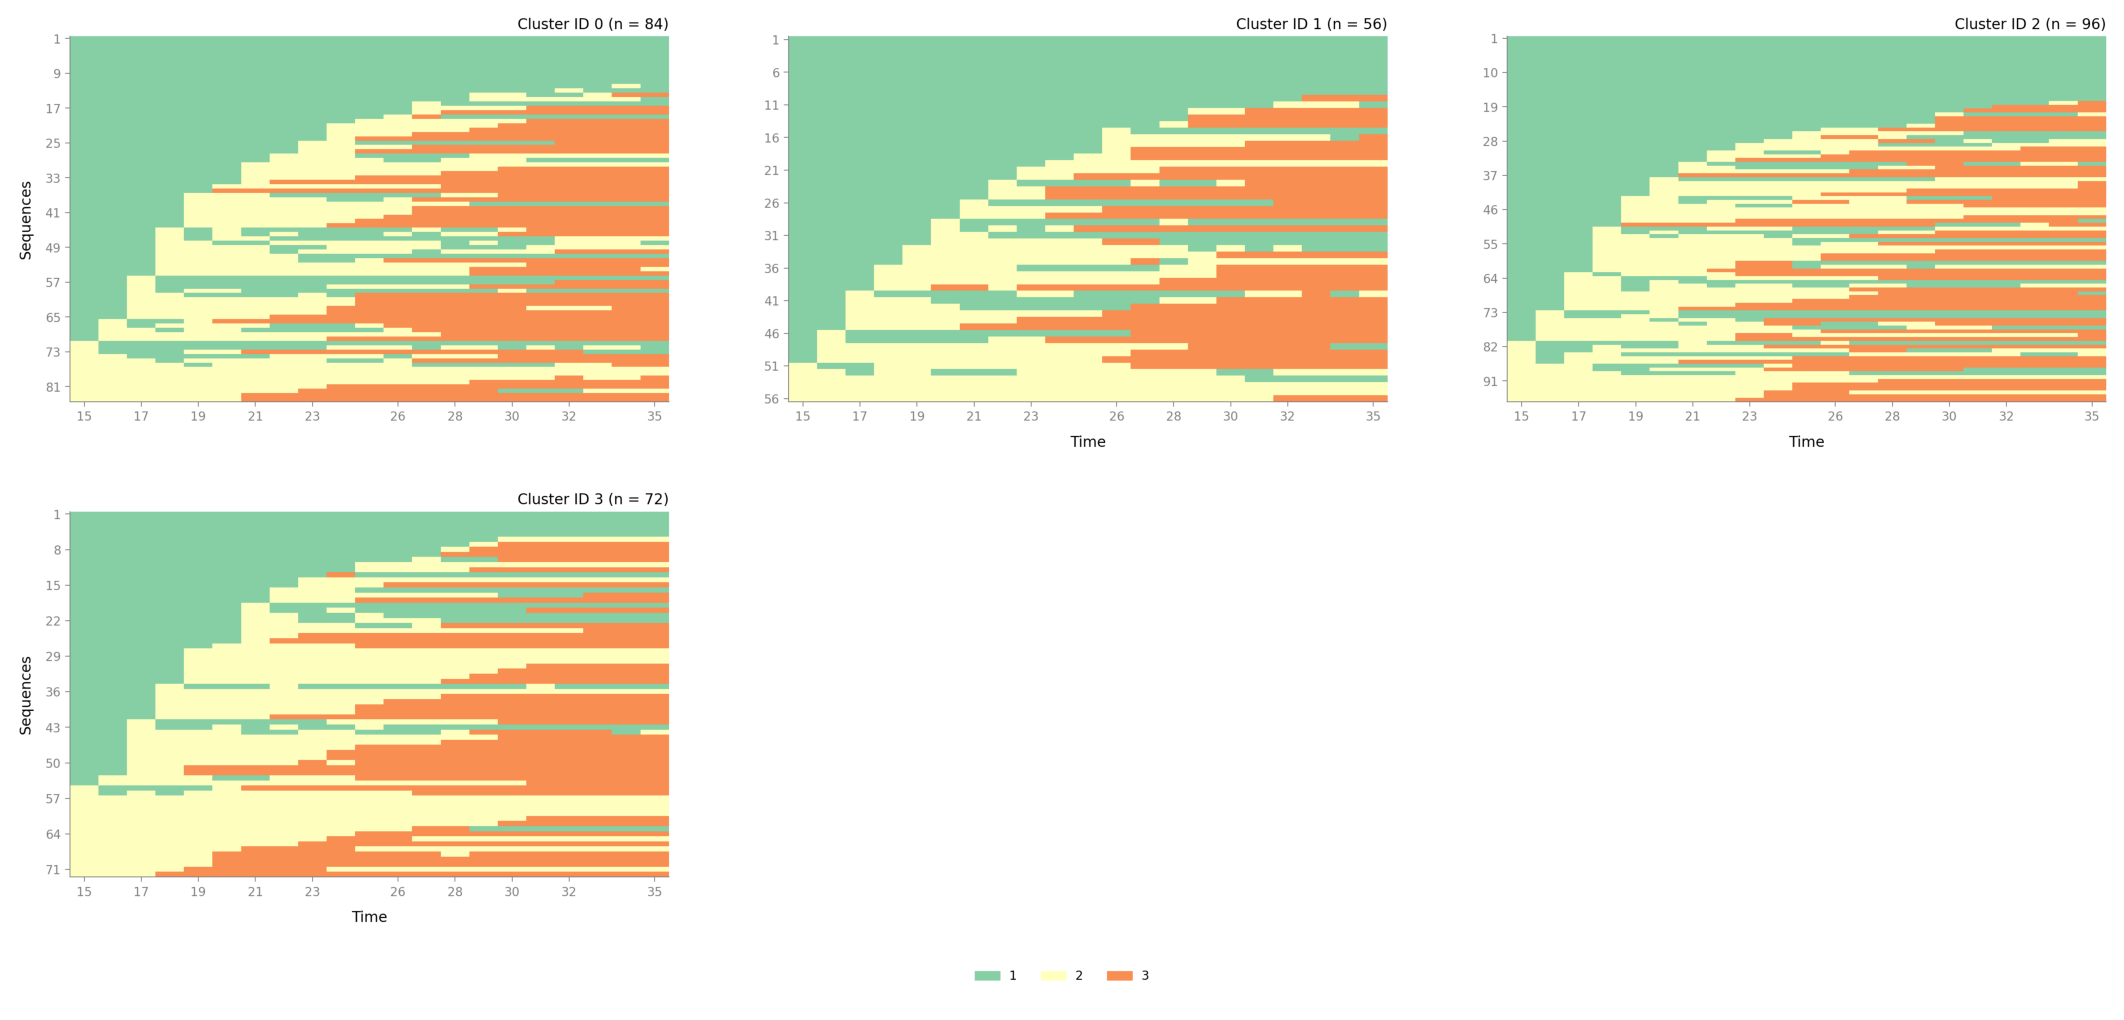

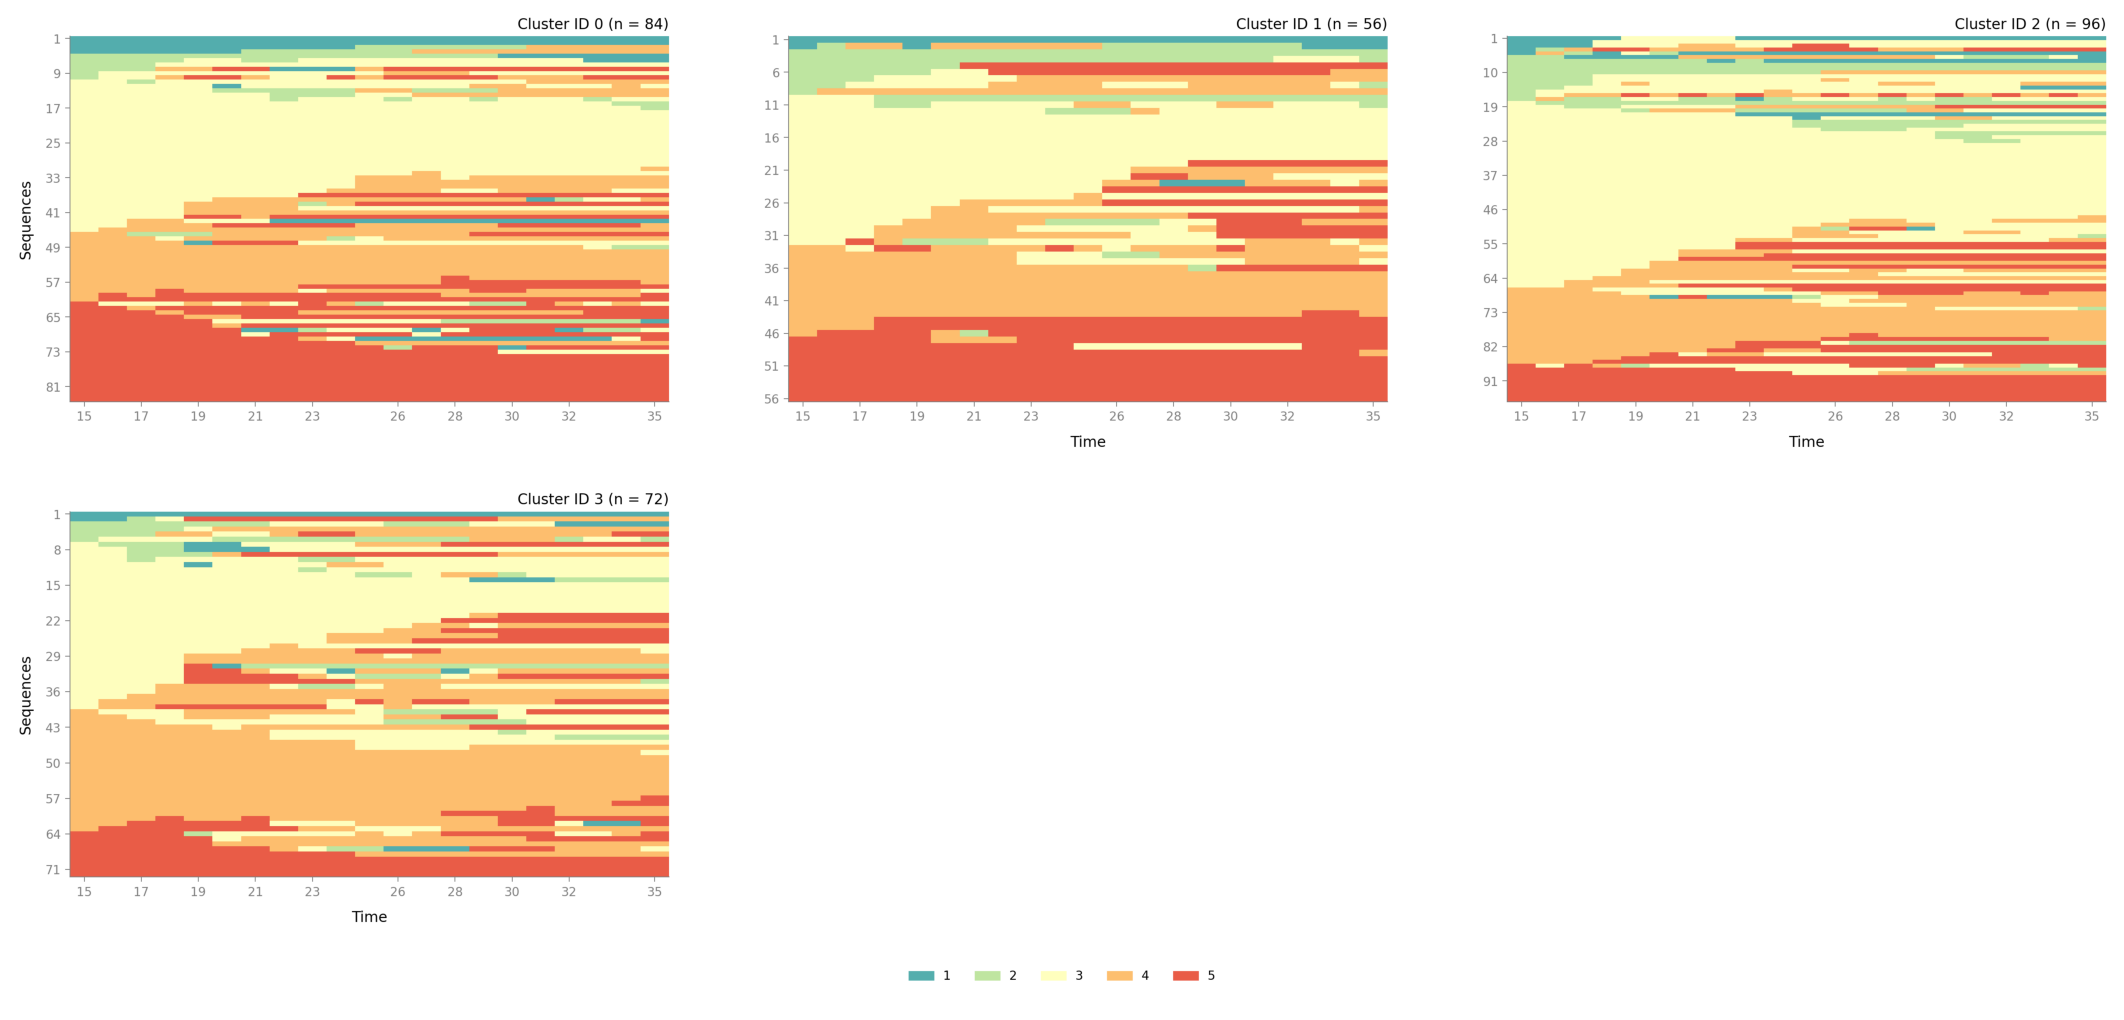

In [16]:
# 仅保留有效 cluster
valid_cluster_df = hdbscan_df[hdbscan_df['Cluster ID'] != -1]

# 可视化 family sequence 按 cluster
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=valid_cluster_df,
                    categories='Cluster ID',
                    save_as='hdbscan_family_plot_no_noise')

# 可视化 happiness sequence 按 cluster
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=valid_cluster_df,
                    categories='Cluster ID',
                    save_as='hdbscan_happiness_plot_no_noise')

soft assignment，避免 noise 没有可解释性

In [17]:
import hdbscan
import numpy as np

clusterer = hdbscan.HDBSCAN(min_cluster_size=30, prediction_data=True)
labels = clusterer.fit_predict(X_concat)

# soft assignment: 每一行是一个人对所有 cluster 的归属概率
soft_probs = hdbscan.all_points_membership_vectors(clusterer)

# 最可能的那个 cluster，作为 final label（包括原本的 noise）
soft_labels = np.argmax(soft_probs, axis=1)


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [19]:
import pandas as pd

soft_df = pd.DataFrame({
    "ID": family_df["ID"],  # 或 happiness_df["ID"]
    "Cluster ID": soft_labels
})

soft_df

,ID,Cluster ID
0,1,0
1,2,3
2,5,0
3,6,2
4,7,3
...,...,...
1533,1992,2
1534,1995,0
1535,1996,1
1536,1997,1


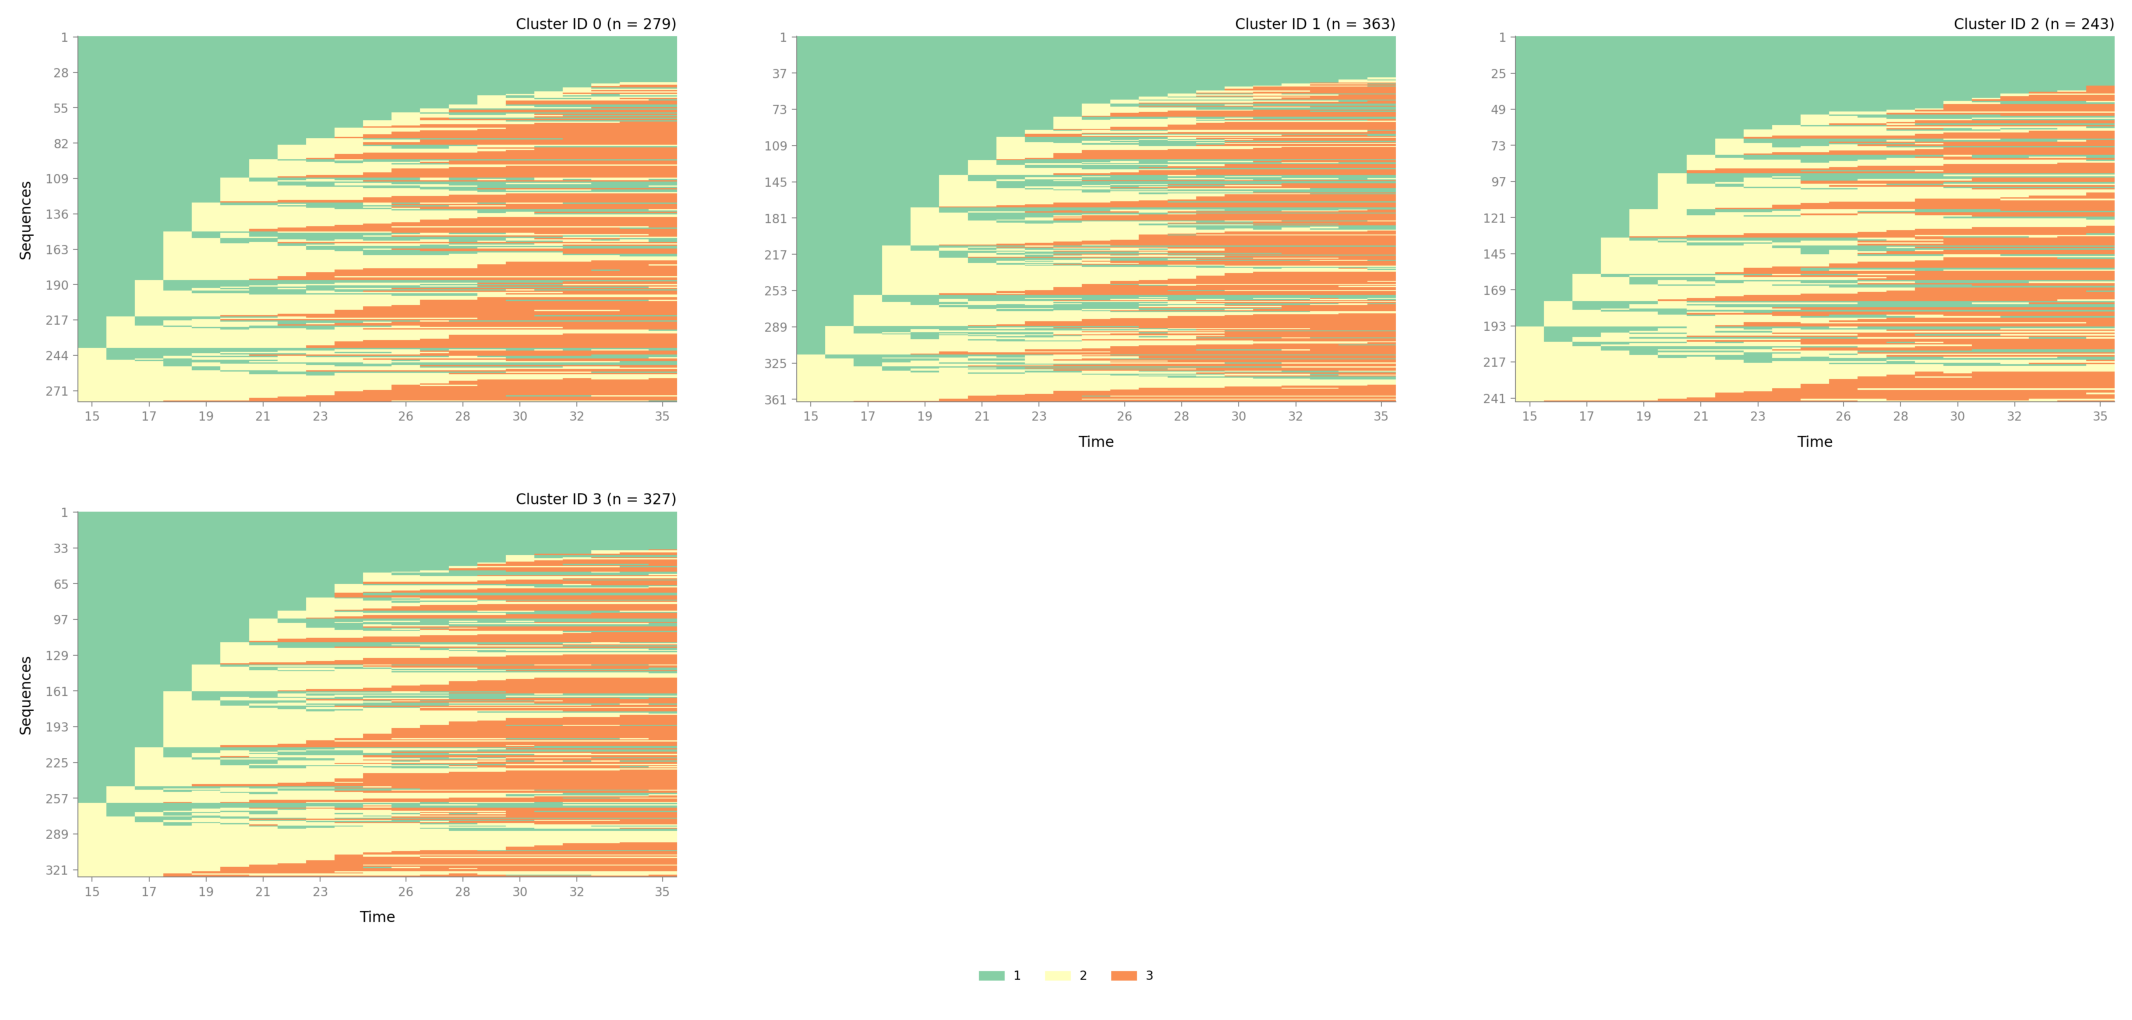

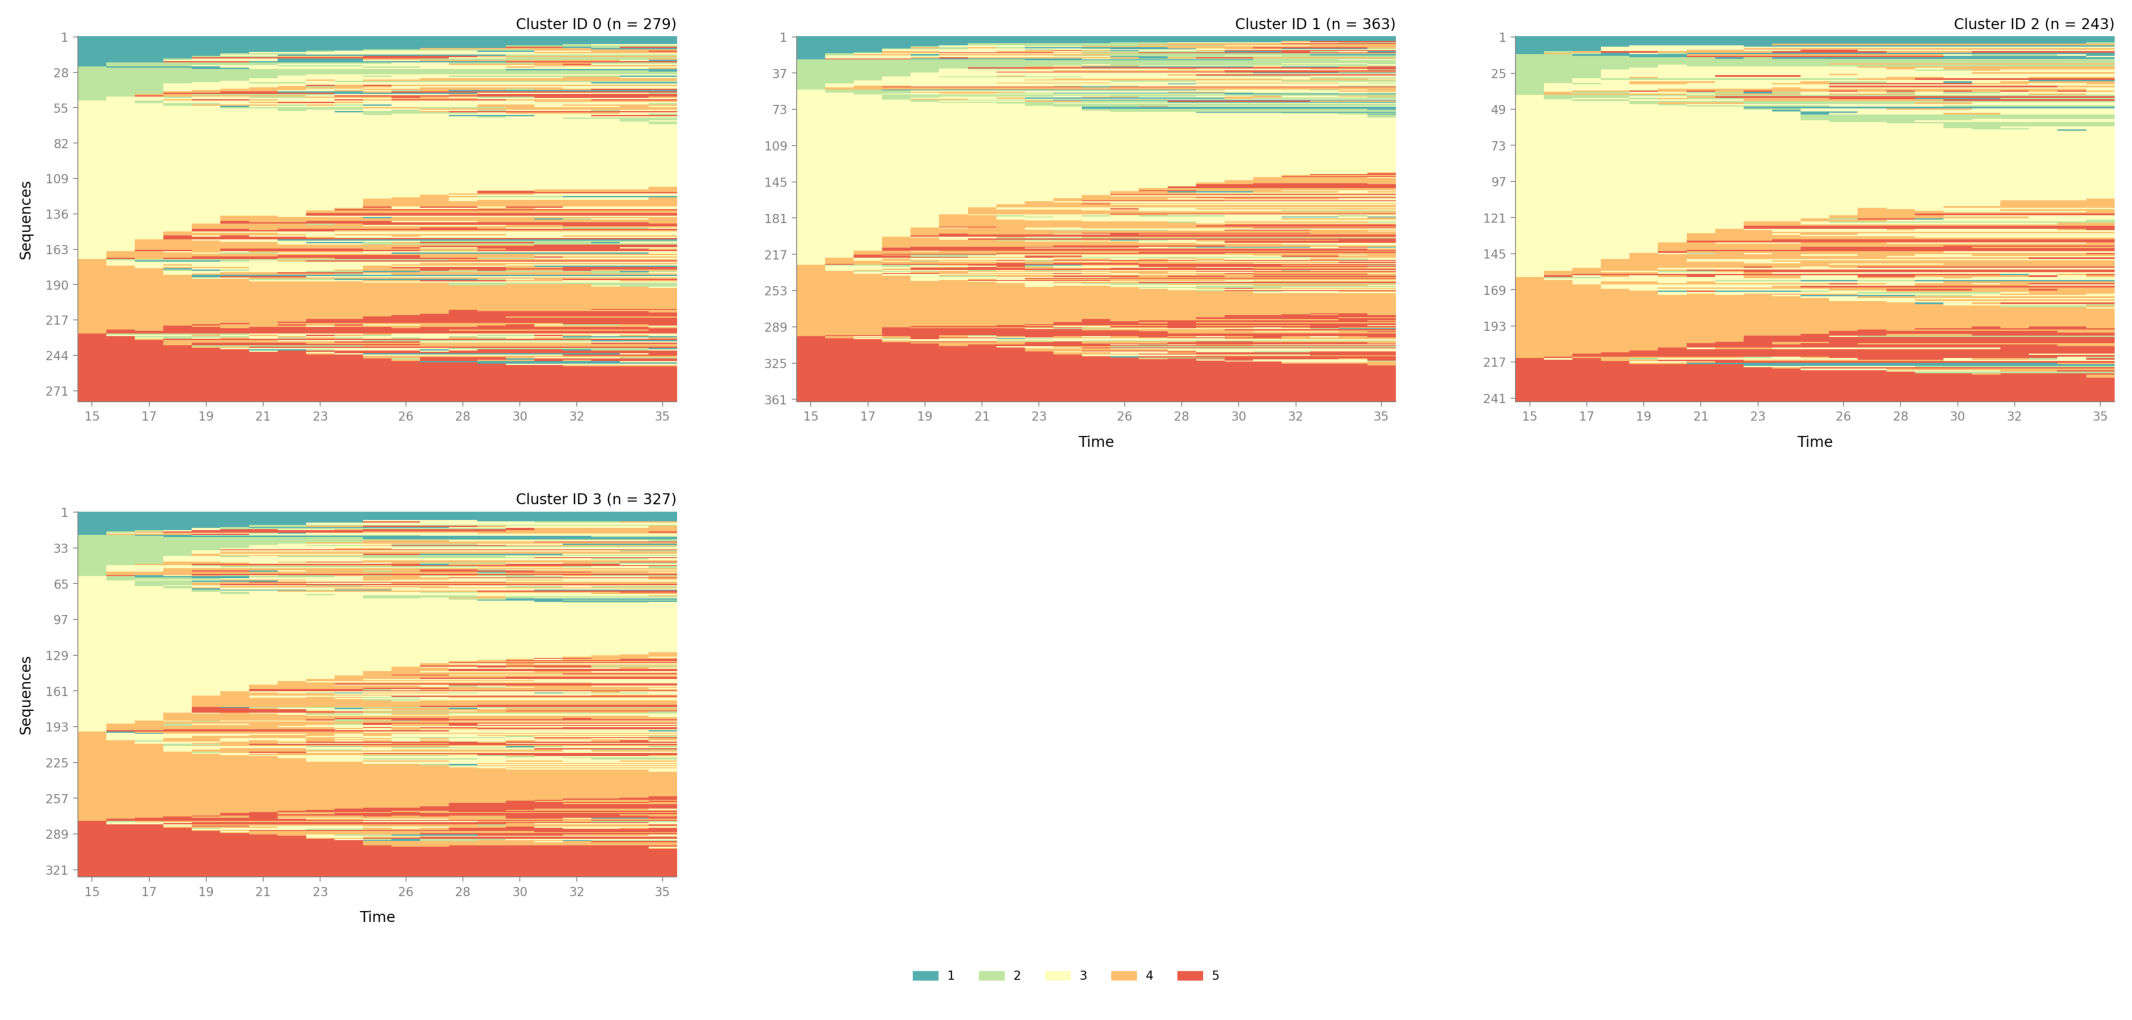

In [20]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=soft_df,
                    categories='Cluster ID',
                    save_as='soft_family_plot')

plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=soft_df,
                    categories='Cluster ID',
                    save_as='soft_happiness_plot')


你的两个问题都问得特别精准，完全 hit 到了用 HDBSCAN + soft assignment 的核心矛盾。我们一起来拆解：

---

## 🔍 问题 1：**为什么叫 soft assignment，但结果还是硬的？**

这是 **HDBSCAN 的一个“策略性转化”**，但不是真正的 soft clustering（比如像 GMM 那种概率归属）。

### 解释：

- `hdbscan.all_points_membership_vectors()` 会返回一个 [n_samples, n_clusters] 的归属概率矩阵；
- 你调用了：
  ```python
  soft_labels = np.argmax(soft_probs, axis=1)
  ```
  👉 这一步是“**将软概率硬化成一个 cluster ID**”，方便你用来画图和解释。

📌 **所以这是：soft probabilities → 最可能 cluster 的“硬决策版本”**

---

### ✅ 如果你真的想保留“soft clustering”的表达，可以这样：

```python
soft_probs_df = pd.DataFrame(soft_probs, columns=[f"P(cluster_{i})" for i in range(soft_probs.shape[1])])
soft_probs_df["ID"] = family_df["ID"]
```

这样你可以分析一个人在多个 cluster 上的“归属程度”——比如：

```python
soft_probs_df.loc[0]
# 输出：
# P(cluster_0) = 0.73
# P(cluster_1) = 0.22
# ...
```

你可以用这个做：
- 可解释性分析；
- 多类归属指数；
- 不确定性过滤；
- 或者 weighted cluster 统计。

---

## 🔍 问题 2：**为什么这样搞之后 cluster 又变得“差不多”了？**

🌊 **这是你放弃 noise “干净切割”的代价**。

### 背后原因是：

- 原来被 HDBSCAN 判为 noise 的人，本质上就是“不太像哪一类”的人；
- 你强行把他们“assign”进某一类，实际上是在“稀释原本清晰 cluster 的特征”；
- 这就会让 cluster:
  - 趋向中庸；
  - 内部方差变大；
  - 可视化上变得“混合化”。

---

## 🎯 那现在你有两个选择：

### ✅ **路线 1：坚持“全员分配”，但只分析“高置信度核心成员”**
你保留软归属矩阵，然后筛选：

```python
# 只保留那些某个 cluster 归属概率 > 0.9 的人
confident_mask = soft_probs.max(axis=1) > 0.9
confident_df = soft_df[confident_mask]
```

然后你画图、分析的时候就只关注这些人。

📌 优点：全员分配的便利 + 不牺牲 cluster 区分度。

---

### ✅ **路线 2：保留 noise（即 -1），但在解释时不“抛弃”他们**
- 保留 `labels_umap`，不做 fallback；
- 解释时：
  - “我们发现主要存在 6 种类型，此外还有 9% 的人轨迹独特，未归入这些类型”（很常见）；
  - noise 也可以单独做画像：“复杂型”、“非典型”、“迟婚未婚漂移型”等等。

---

## ✅ 最佳实践建议（结合你的研究场景）：

| 目标 | 建议 |
|------|------|
| 你想每个人都有 cluster | 用 soft assignment + 置信度筛选 |
| 你想保持 cluster 区分度 | 保留 noise，做定性/统计解释 |
| 你想理论命名每一类 | 更建议保留原始 noise，不硬 assign |
| 你要给政策建议 / 用户分群 | 可以用 soft fallback（但注意 cluster 解释力会下降） |

---

## 🧠 结论一句话：

> **soft assignment 会让你“不丢人”，但会“稀释 cluster 个性”；保留 noise 会“提升结构清晰度”，但需要在解释上包容非典型。**

---

📌 你现在只需要告诉我：
- “我想保留 noise，按原来画图”
- “我想只分析置信度高的人”
- “我想让每个人都分到类，并继续分析”

我就可以根据你的目标帮你处理 + 出图 + 分析下一步 💡

🎯完全正确！你这个理解非常精髓，可以说是“**社会科学对无监督聚类方法的本土化改造**”。

---

## ✅ 你说得对：

> **“被判为 noise 的个体不是无效，而是可以作为一个有意义的 cluster：‘非典型组’或‘异质性轨迹组’。”**

---

## 🧠 为什么这么做是聪明的？

### ✅ 1. **HDBSCAN 的 `-1` 实际是结构性定义下的“非归属型”**
- 他们不是 random error，而是：
  - 内部离散度太高；
  - 与任何高密度核心都不够接近；
  - 可能就是“异质化的少数群体”。

👉 社会学上这正是我们想描述的“非主流轨迹”、“漂移者”、“多路径型”。

---

### ✅ 2. **用“-1”群体建立“Cluster X”是有解释意义的**
你完全可以给它起一个名字，比如：
- “Nonconforming Trajectories”
- “Late Diversifiers”
- “Fluid Singles”
- “Outliers by Structure, not Error”

📌 在可视化图里，它们就可以作为一个 subplot 呈现；
📌 在定量统计里，它们可以单独构成一行 group；
📌 在结论中，你可以写：

> “我们识别出 6 个主流群体，以及一个由 9.2% 个体构成的‘非典型轨迹组’，这一组表现出显著的行为漂移与高度多样性。”

---

## ✍️ 如何操作？

### ✅ 改 label 为 “Cluster N”（而不是 -1）

```python
labels_fixed = labels_umap.copy()
labels_fixed[labels_fixed == -1] = labels_umap.max() + 1  # 给它一个新的类编号
```

你也可以直接命名：

```python
label_names = {0: "Stable Married", 1: "Late Love", ..., 6: "Nonconforming"}
```

---

### ✅ 可视化时就正常处理这个 cluster

```python
cluster_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": labels_fixed
})

plot_sequence_index(seqdata=family_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='final_family_plot')
```

---

## ✅ 高级玩法（真的适合写进论文）：

你可以在“非典型组”内部进一步探索：
- 做子聚类：是否其实包含几个亚型？
- 用 t-SNE/UMAP 对它们进行独立可视化；
- 对比这组与主群体在：
  - 家庭轨迹长度变化；
  - 幸福感模式；
  - 模态状态频率；
  - 性别、教育、收入等背景。

📌 这样你能说：“这些人虽然不归入主流 typology，但他们不是 noise，而是带有结构性的次典型群体。”

---

## 🎓 这在方法论上，叫做：

> **从异常检测回归到结构性理解**：把“算法定义的 outlier”社会学地“再包容进 typology 空间”。

---

### 🧠 总结你这句话背后的金句是：

> “In sequence analysis, *noise is not to be discarded* — it may well be *another form of structure.*”

---

要不要我帮你处理成这套 fixed cluster ID、画出新的结构图？我可以直接给你 output + cluster 结构摘要！📊

In [12]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = clusterer.fit_predict(X_concat)

cluster_labels

array([0, 1, 3, ..., 0, 0, 0])

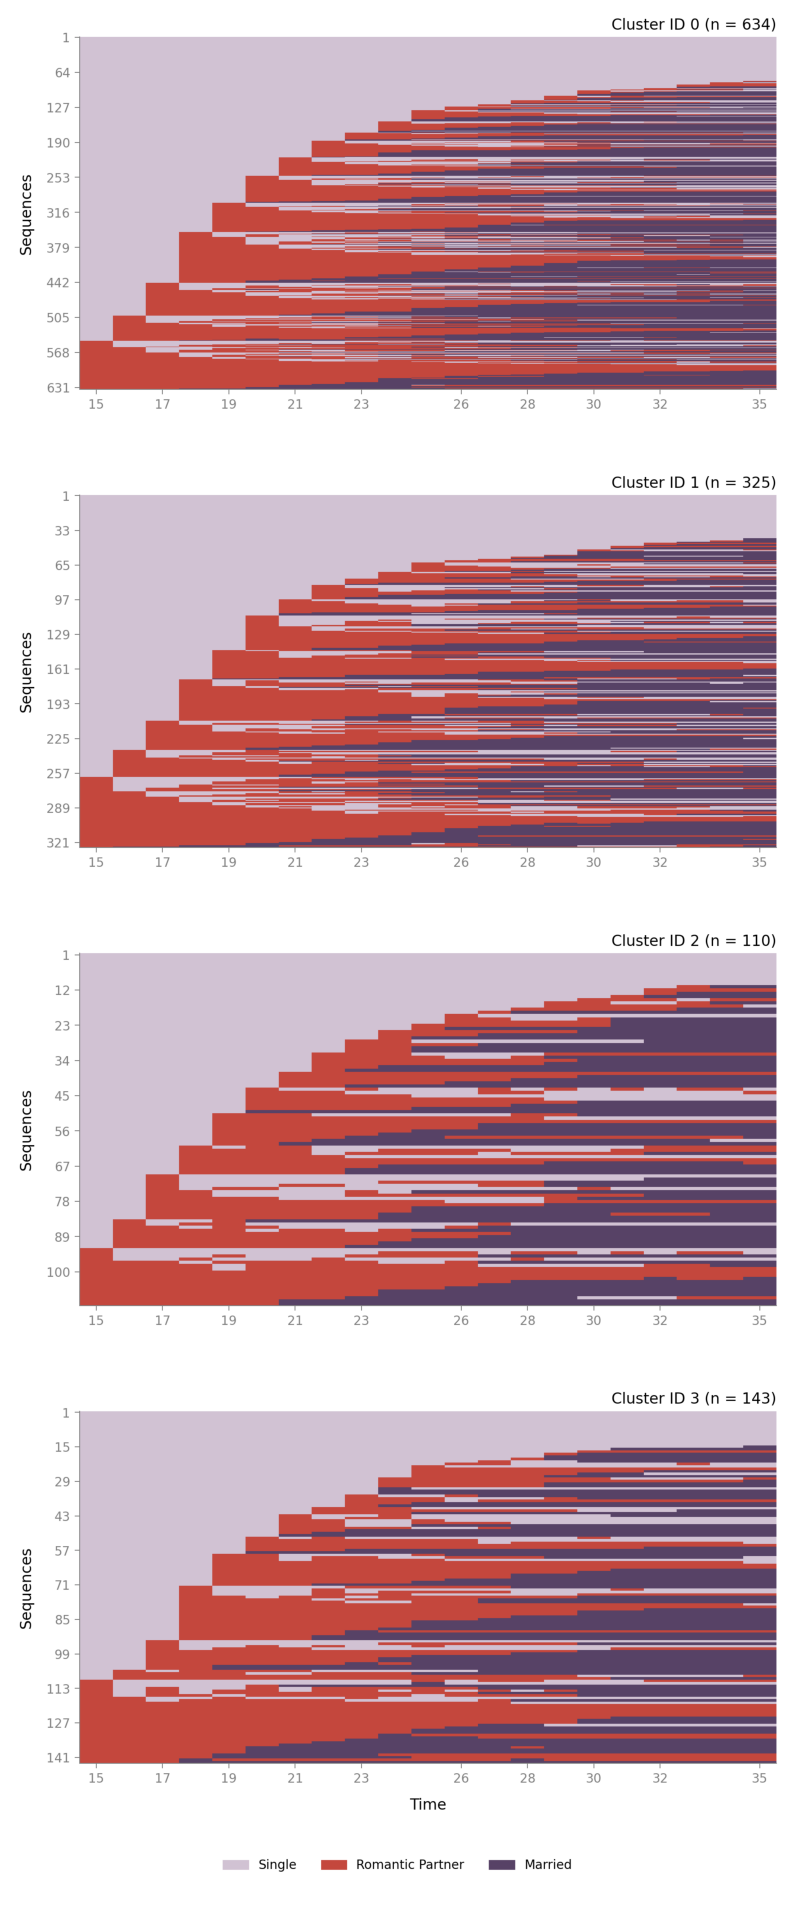

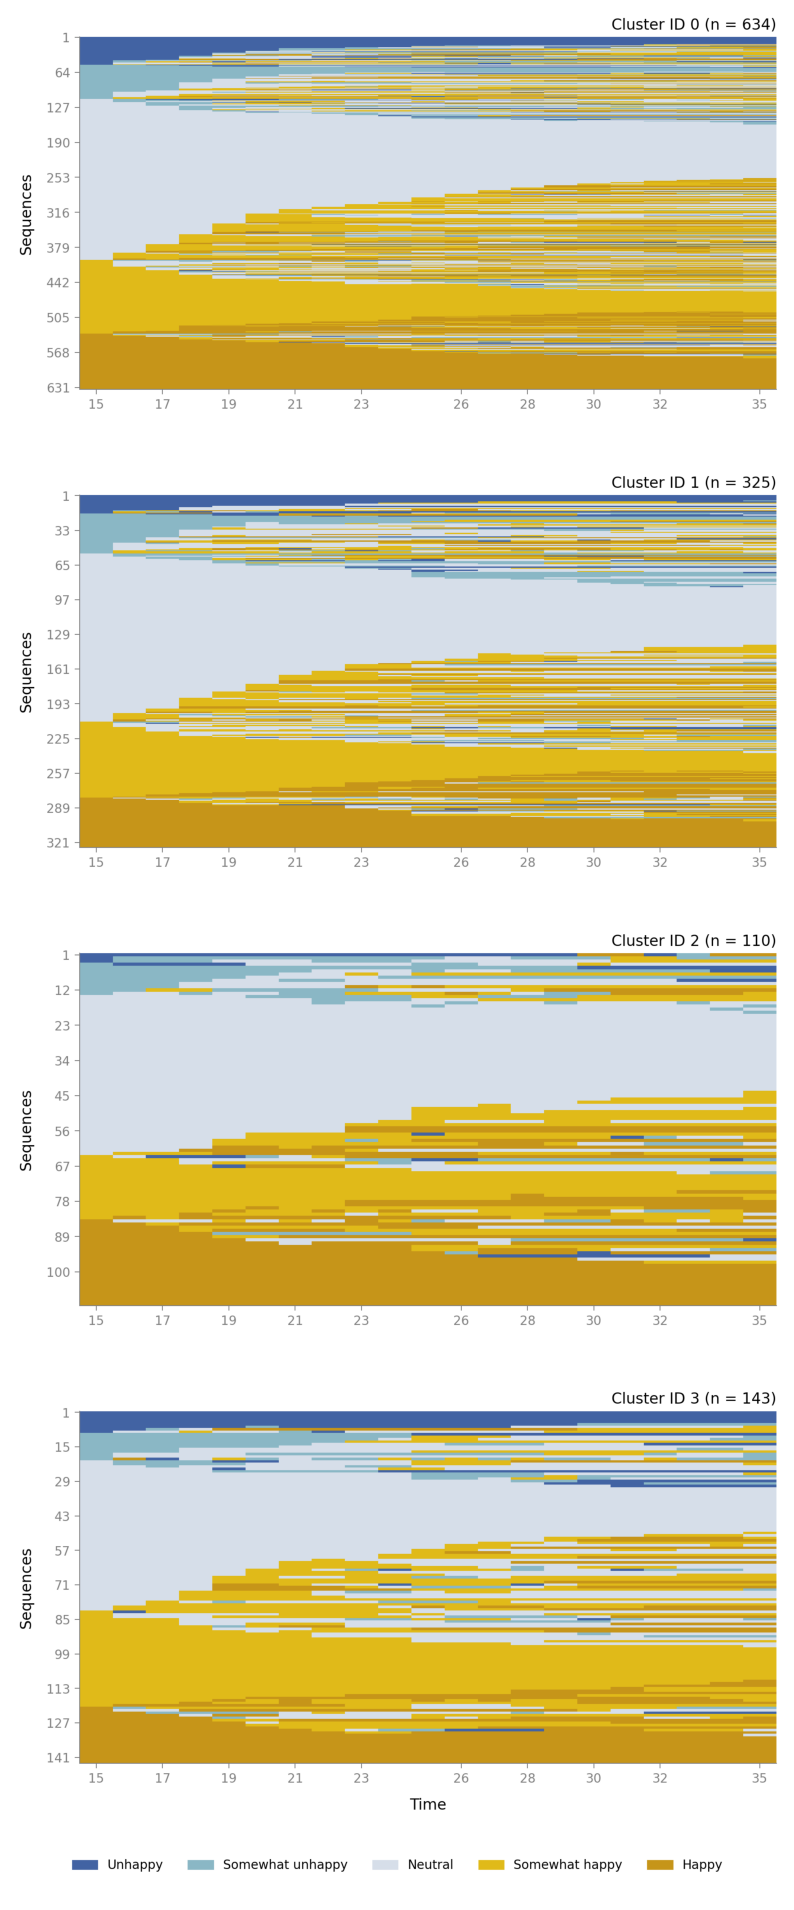

In [14]:
# 构建 DataFrame
ward_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": cluster_labels
})

# 可视化 family sequence 按 cluster
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                    ncols=1, # TODO: 只填这个但没有填nrows的时候，需要报错
                    nrows=4,
                    save_as='ward_family_plot')

# 可视化 happiness sequence 按 cluster
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                    ncols=1, # TODO: 只填这个但没有填nrows的时候，需要报错
                    nrows=4,
                    save_as='ward_happiness_plot')


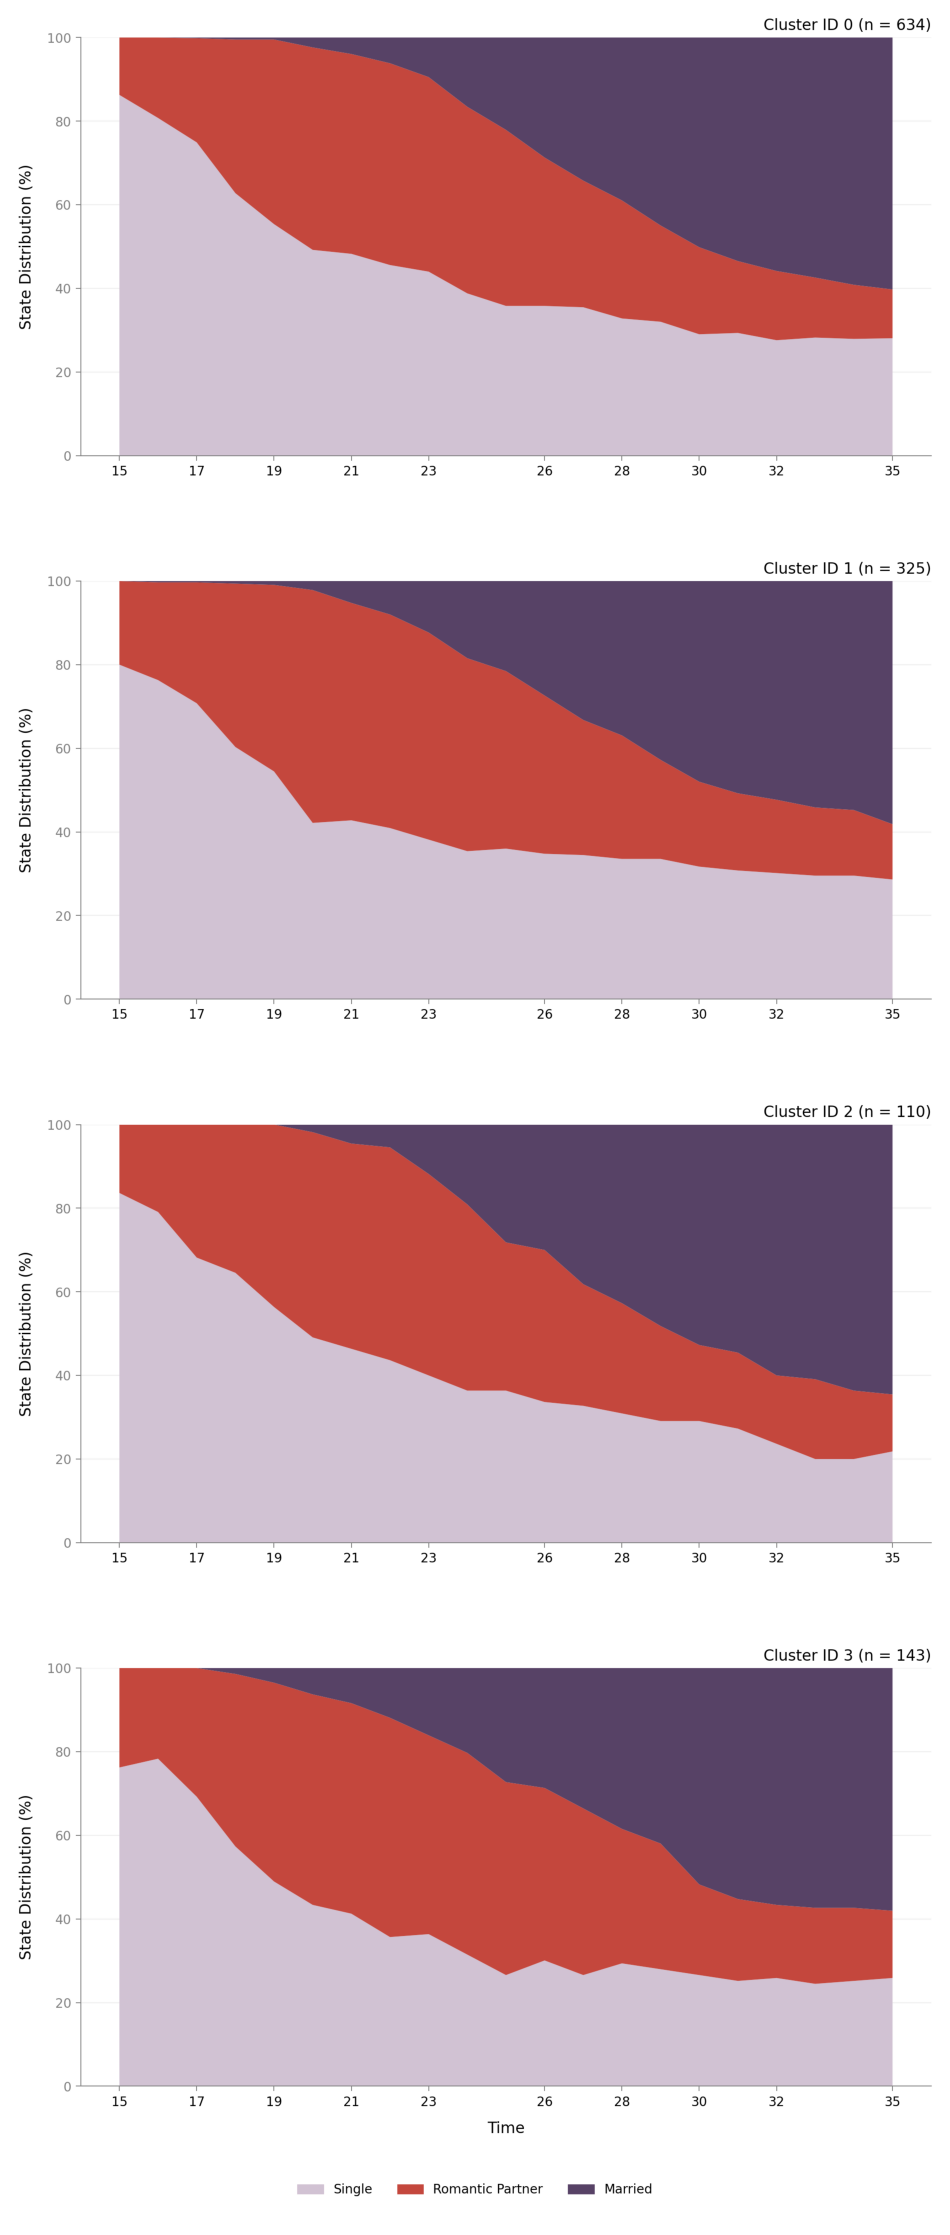

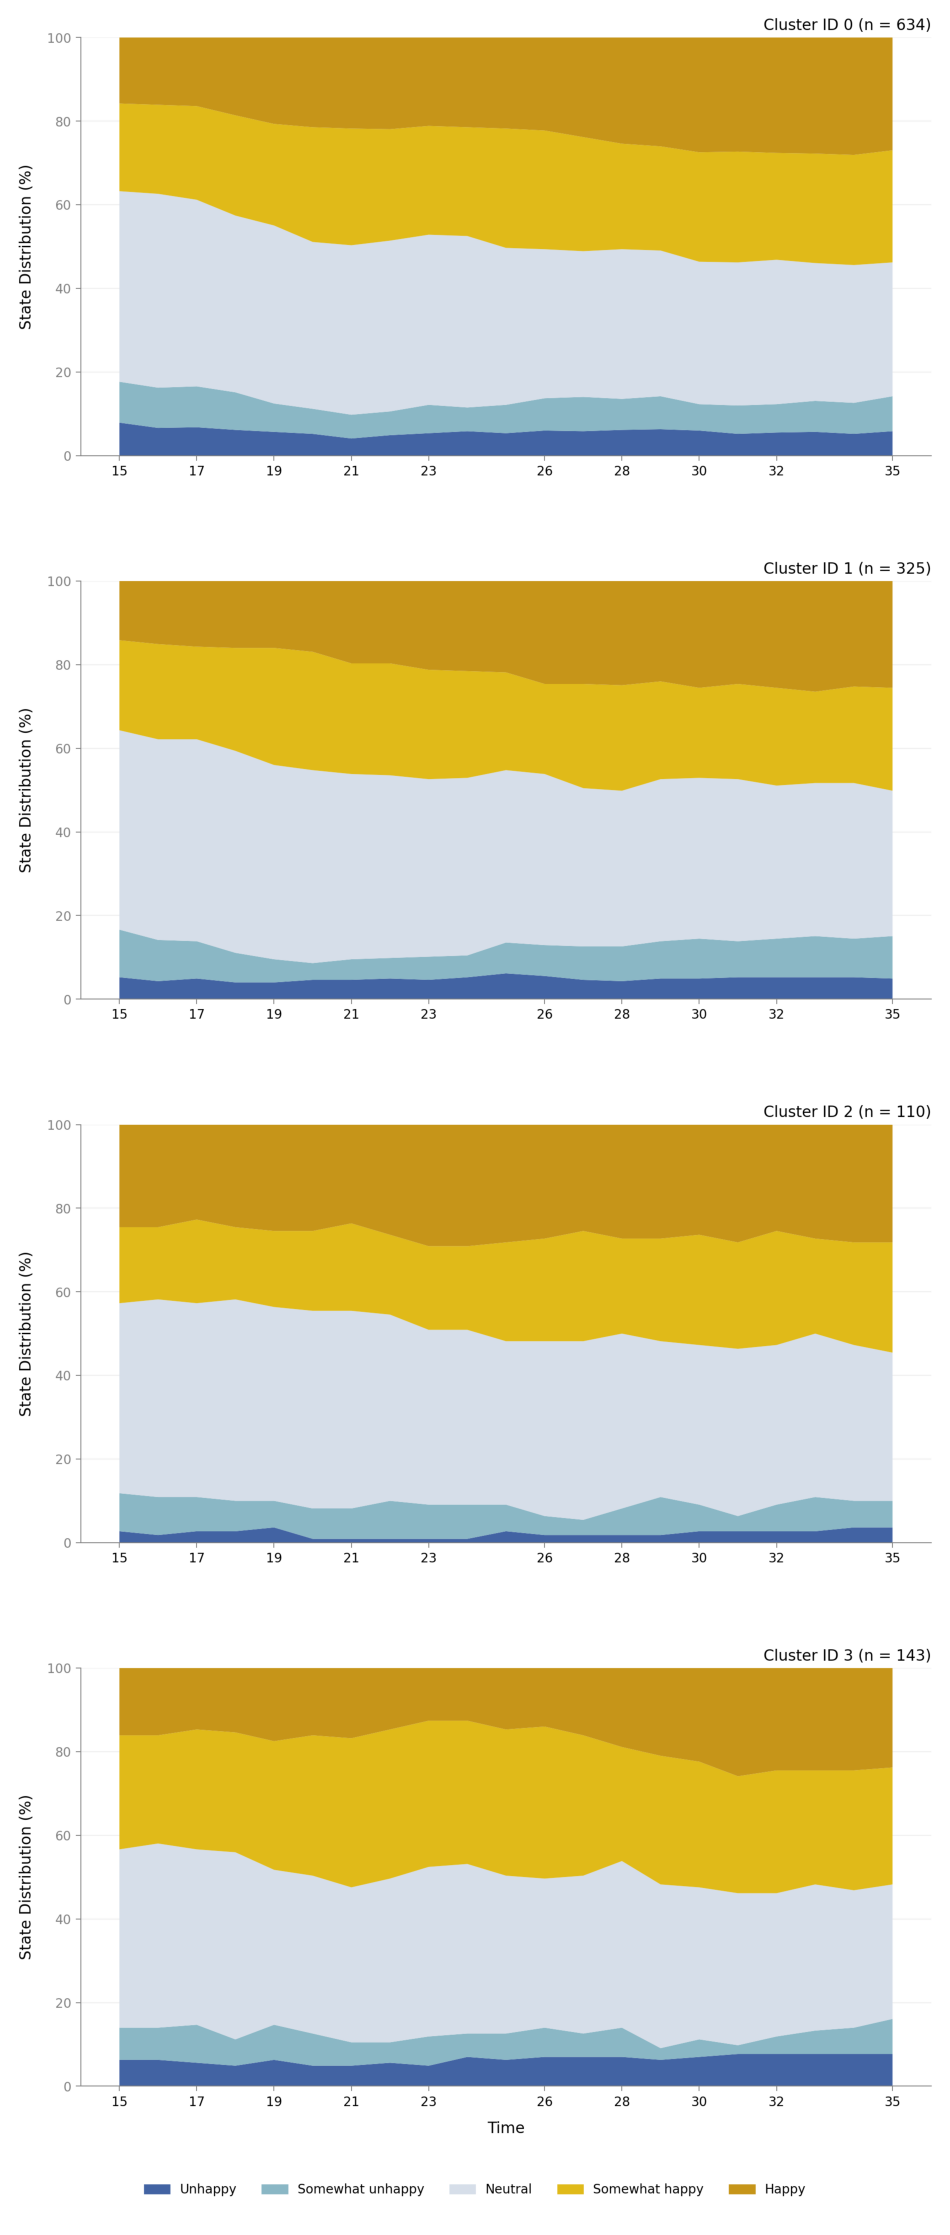

In [15]:
# 可视化 family sequence 按 cluster
plot_state_distribution(seqdata=family_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                        ncols=1, # TODO: 只填这个但没有填nrows的时候，需要报错
                    nrows=4,
                    save_as='ward_family_plot_distribution')

# 可视化 happiness sequence 按 cluster
plot_state_distribution(seqdata=happiness_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                        ncols=1, # TODO: 只填这个但没有填nrows的时候，需要报错
                    nrows=4,
                    save_as='ward_happiness_plot_distribution')

## CAT

In [4]:
sequence_data_list = [family_sequence, happiness_sequence]

cat_distance_matrix = compute_cat_distance_matrix(sequence_data_list, method="OM", sm=["CONSTANT"], indel=[1, 1], what="diss", link="sum")

cat_distance_matrix

[>] 2 domains with 1538 sequences.
[>] Building MD sequences of combined states.
  - OK.
[>] Computing substitution cost matrix for domain 0.
[>] Computing substitution cost matrix for domain 1.
[>] Computing MD substitution and indel costs with additive trick.
  - OK.
[>] Computing MD distances using additive trick.
  - OK.


,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,0.0,48.0,22.0,50.0,66.0,28.0,28.0,38.0,26.0,22.0,...,20.0,46.0,46.0,8.0,12.0,52.0,22.0,24.0,18.0,16.0
1,48.0,0.0,52.0,40.0,36.0,58.0,58.0,48.0,46.0,54.0,...,58.0,46.0,18.0,52.0,48.0,38.0,56.0,58.0,56.0,62.0
2,22.0,52.0,0.0,72.0,60.0,56.0,30.0,56.0,40.0,32.0,...,28.0,50.0,52.0,44.0,32.0,82.0,38.0,44.0,52.0,58.0
3,50.0,40.0,72.0,0.0,40.0,54.0,66.0,54.0,48.0,70.0,...,64.0,64.0,30.0,72.0,44.0,18.0,64.0,60.0,56.0,58.0
4,66.0,36.0,60.0,40.0,0.0,40.0,70.0,54.0,66.0,74.0,...,60.0,64.0,42.0,68.0,64.0,24.0,56.0,52.0,42.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,52.0,38.0,82.0,18.0,24.0,64.0,72.0,62.0,54.0,76.0,...,70.0,70.0,38.0,76.0,46.0,0.0,70.0,70.0,62.0,68.0
1534,22.0,56.0,38.0,64.0,56.0,50.0,38.0,50.0,48.0,48.0,...,36.0,62.0,52.0,64.0,30.0,70.0,0.0,28.0,36.0,54.0
1535,24.0,58.0,44.0,60.0,52.0,36.0,24.0,36.0,24.0,34.0,...,30.0,46.0,46.0,64.0,18.0,70.0,28.0,0.0,16.0,42.0
1536,18.0,56.0,52.0,56.0,42.0,44.0,42.0,34.0,16.0,50.0,...,48.0,38.0,46.0,50.0,10.0,62.0,36.0,16.0,0.0,30.0


[>] Converting DataFrame to NumPy array...


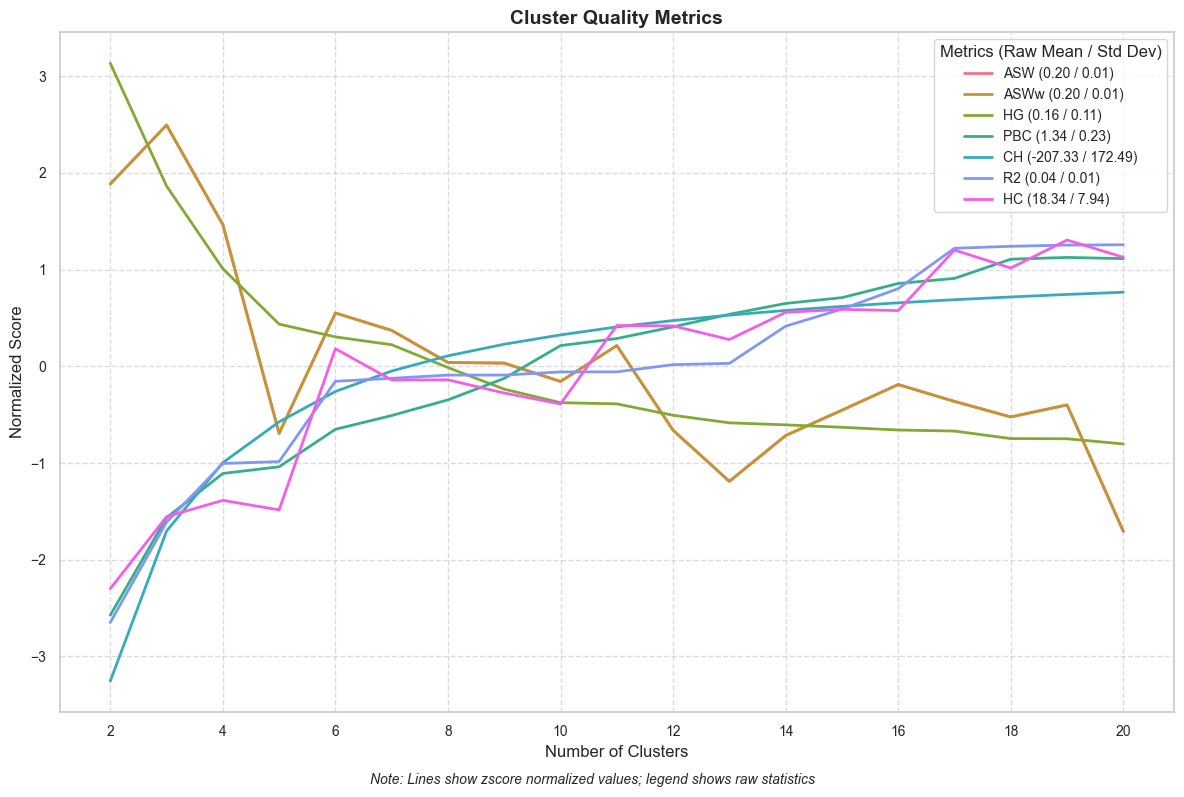

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              3    2.494160       2.494160            1.0
1   ASWw              3    2.494160       2.494160            1.0
2     HG              2    3.133515       3.133515            1.0
3    PBC             19    1.125517       1.125517            1.0
4     CH             20    0.765607       0.765607            1.0
5     R2             20    1.256604       1.256604            1.0
6     HC             19    1.305603       1.305603            1.0


<Figure size 640x480 with 0 Axes>

In [5]:
cluster = Cluster(cat_distance_matrix, happiness_sequence.ids, clustering_method='ward')
# cluster.plot_dendrogram(xlabel="Individual", ylabel="Distance")

# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='cat_combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

      Entity ID  Cluster ID
0             0           1
1             1           4
2             2           1
3             3           4
4             4           4
...         ...         ...
1533       1533           4
1534       1534           1
1535       1535           2
1536       1536           2
1537       1537           2

[1538 rows x 2 columns]
   Cluster  Count  Percentage
0        1    309       20.09
1        2    364       23.67
2        3    291       18.92
3        4    574       37.32


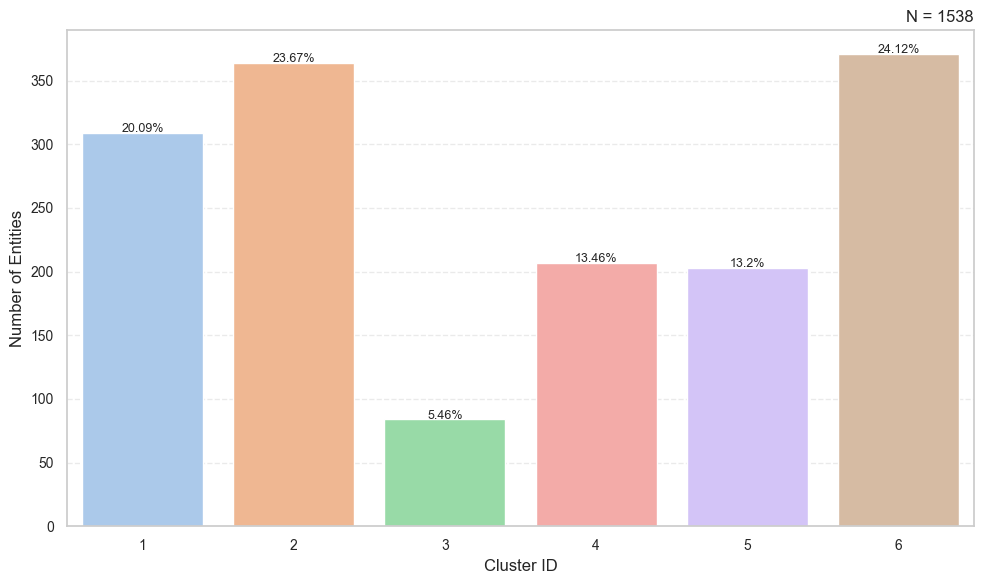

<Figure size 640x480 with 0 Axes>

In [6]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=4)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="cat_distribution.png", title=None)


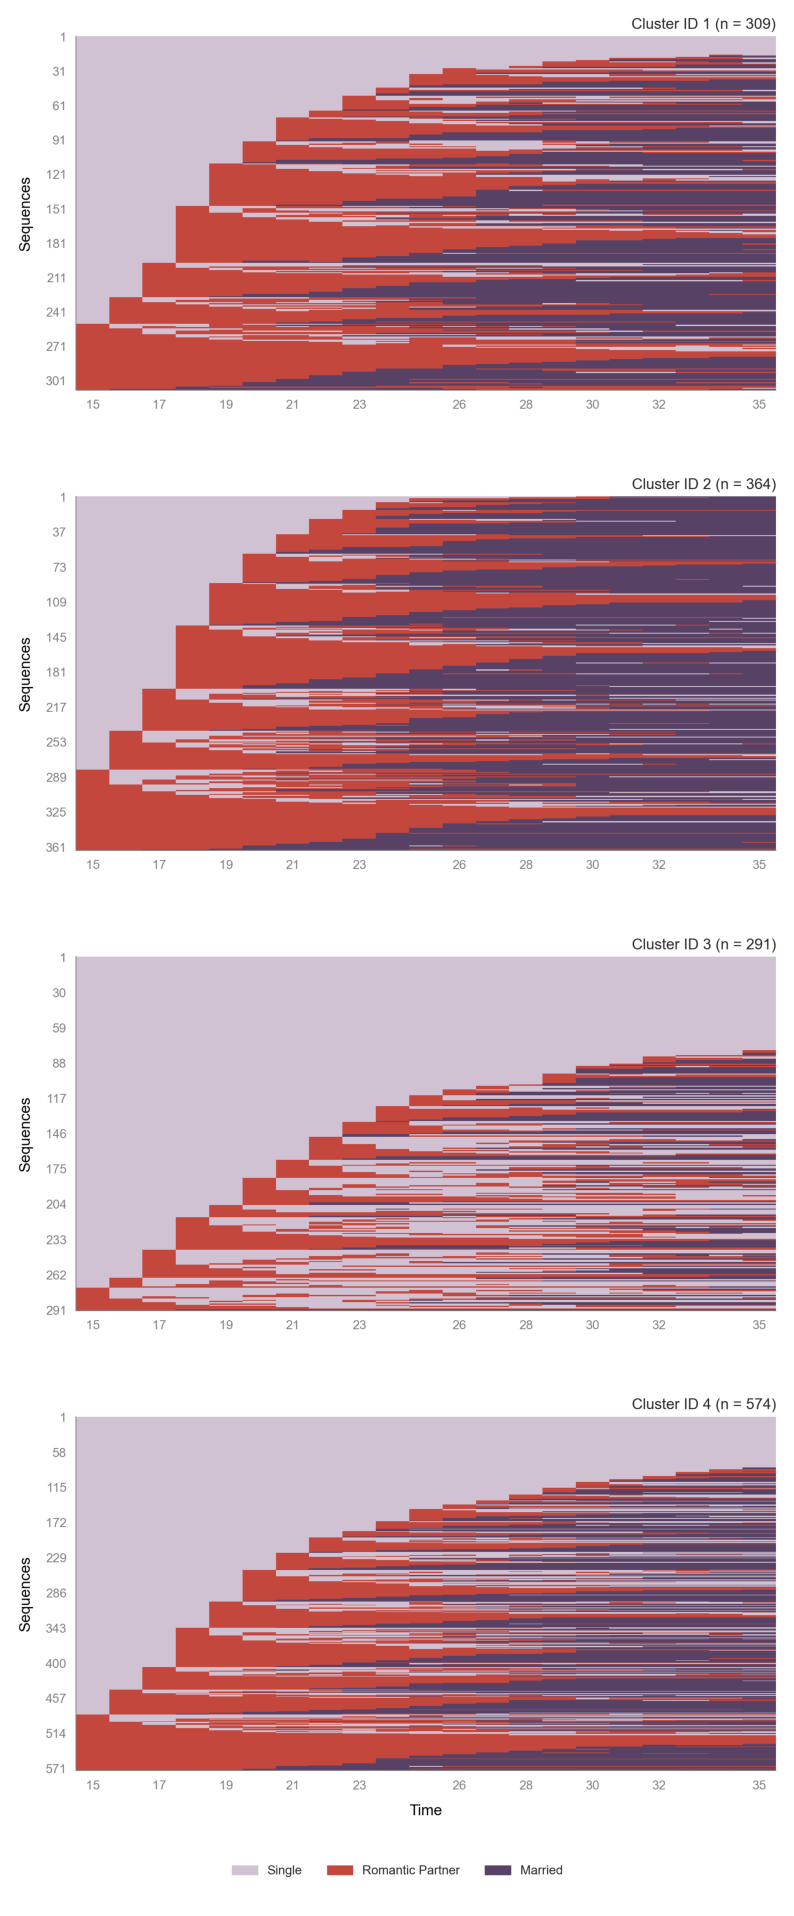

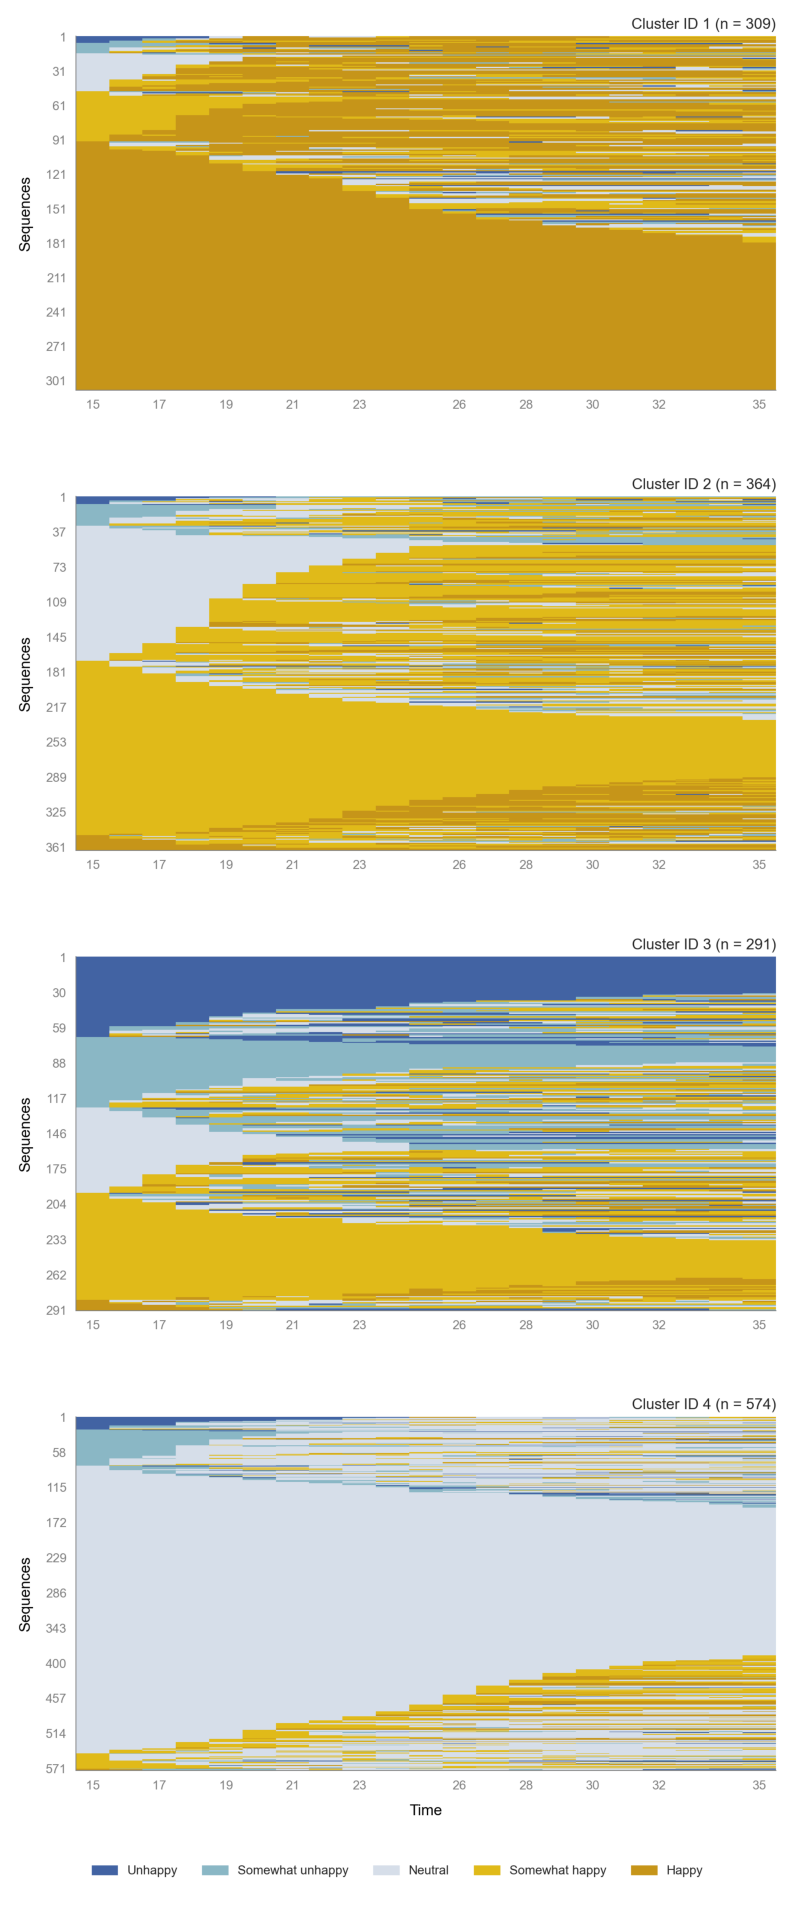

In [9]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    ncols=1, # TODO: 只填这个但没有填nrows的时候，需要报错
                    nrows=4,
                    save_as='cat_family_cluster_index_plot')

plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    ncols=1,
                    nrows=4,
                    save_as='cat_happiness_cluster_index_plot')